In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer, QuantileTransformer

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 11)

In [5]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
data['Ticket'].nunique()

681

In [14]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

#### Finding numerical and categorical features

In [15]:
categorical_features=[features for features in data.columns if data[features].dtypes =='O']


In [16]:
len(categorical_features)

5

In [17]:
numerical_features= [features for features in data.columns if data[features].dtypes !='O']

In [18]:
len(numerical_features)

6

In [19]:
features_with_na= [features for features in data.columns if data[features].isnull().sum()>1]

In [20]:
len(features_with_na)

3

#### finding the percentage of null values

In [21]:


for feature in features_with_na:
    print(feature,'column has', np.round(data[feature].isnull().mean(),3), '% of missing values')

Age column has 0.199 % of missing values
Cabin column has 0.771 % of missing values
Embarked column has 0.002 % of missing values


#### Filling missing values

In [22]:
data['Age']=data['Age'].fillna(data['Age'].median())



In [23]:
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])

In [24]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [25]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## Exploratory Data Analysis

#### median and mean fares paid by passengers

In [26]:
med_fare = data.groupby(['Pclass'])['Fare'].median()
mean_fare = data.groupby(['Pclass'])['Fare'].mean()
print(med_fare)
print(mean_fare)

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


#### Median age of travellers Agewise according to the Pclass 

In [27]:
data.groupby(['Sex', 'Pclass']).median()['Age']


C:\Users\munee\AppData\Local\Temp\ipykernel_12980\73764166.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Sex', 'Pclass']).median()['Age']


Sex     Pclass
female  1         32.5
        2         28.0
        3         28.0
male    1         36.0
        2         29.0
        3         28.0
Name: Age, dtype: float64

#### Proportion of passengers who embarked from different places 

In [28]:
counts=data['Embarked'].value_counts()
counts

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### Frequency graph

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

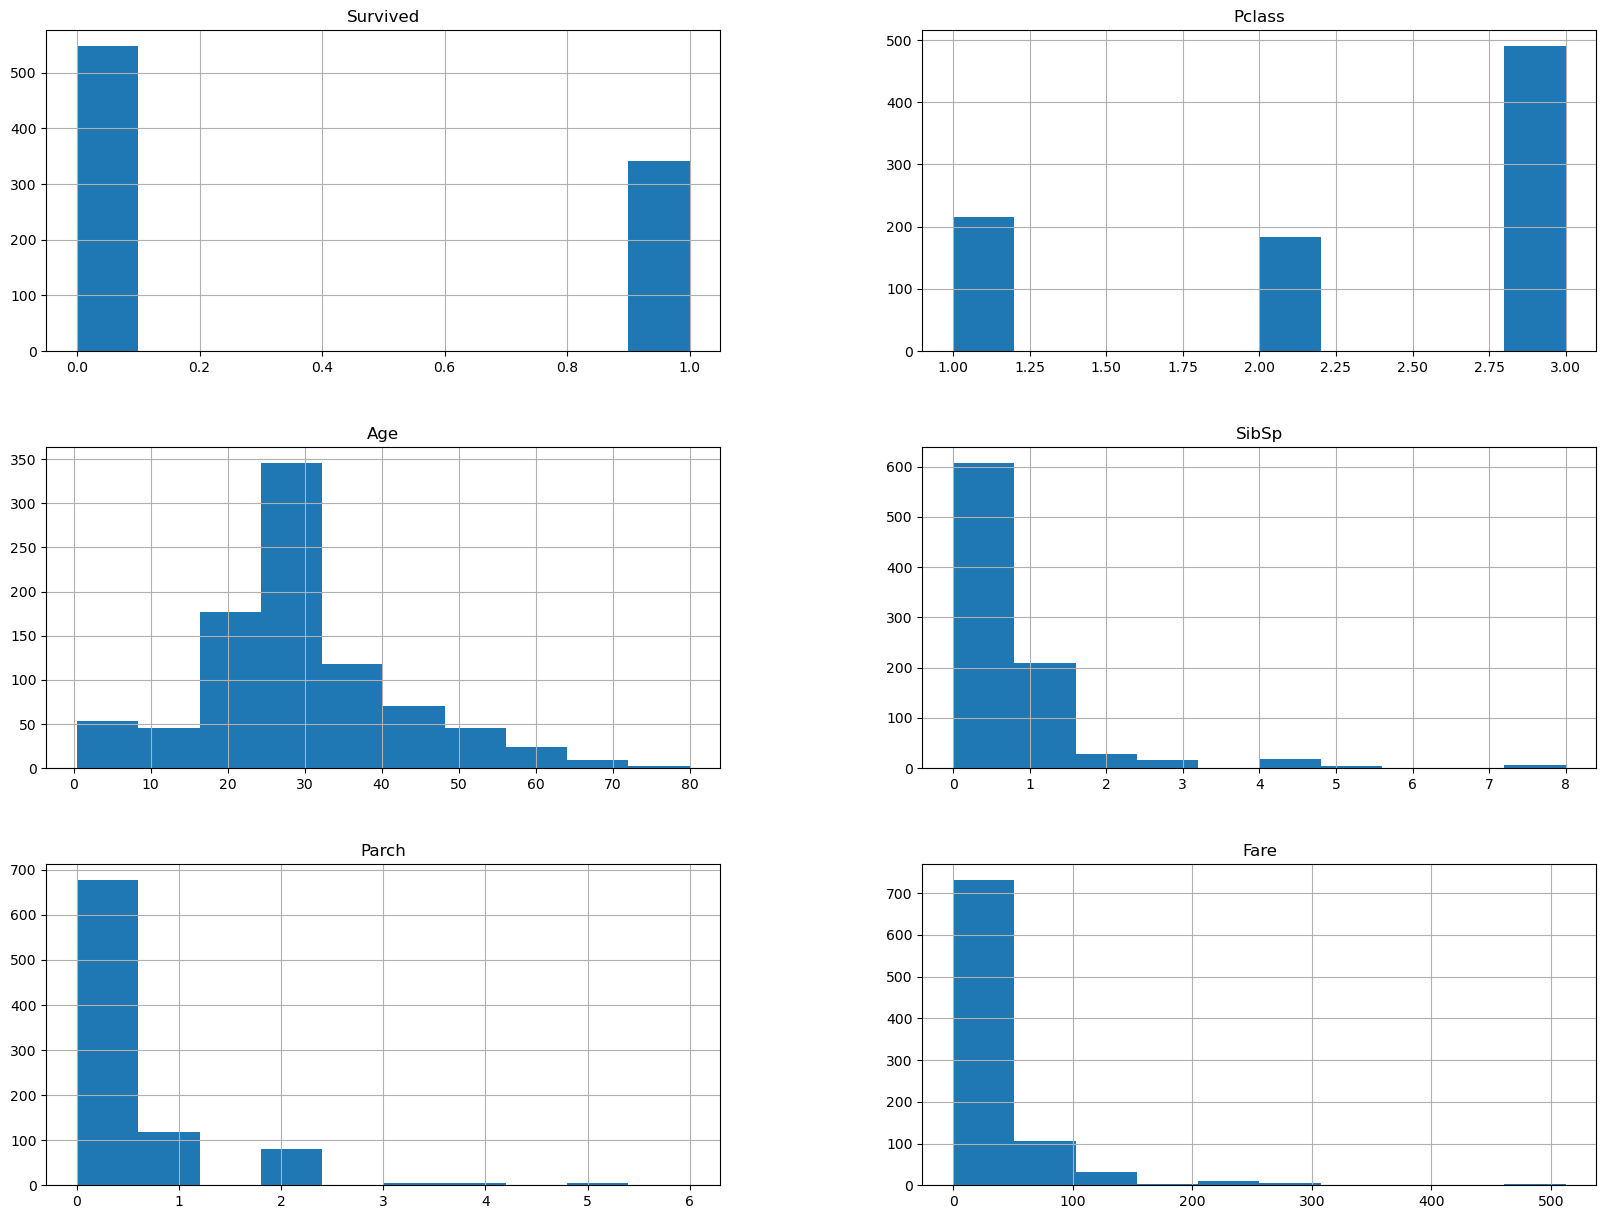

In [29]:
freqgraph=data.select_dtypes(include=['int',"float"])
freqgraph.hist(figsize=(20,15))

#Around 550 died  and around 340 people survived

#Majority of the travellers  are fromthe age group 17-22.Passengers rangesfrom as young as an infant to an elderly aged 80 years old.

#Around 740 passengers have paid fare in the range within 50

#Around 660 passengers have total number of the passengers' parents and children in the range of 

#majority of passengers are travelling with spouse or siblins

### Displot of continuous features-Kde

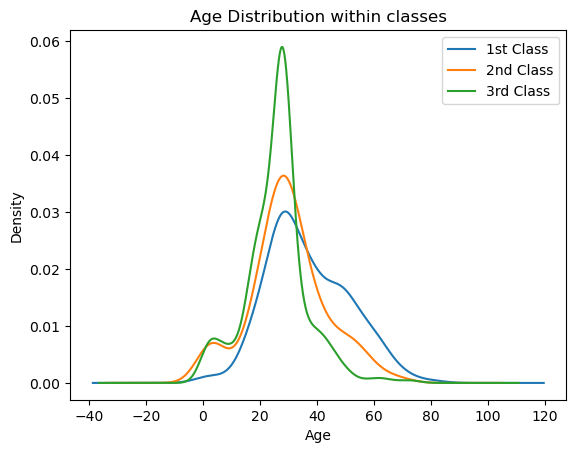

In [30]:
data.Age[data['Pclass']== 1].plot(kind='kde')    
data.Age[data['Pclass'] == 2].plot(kind='kde')   
data.Age[data['Pclass'] == 3].plot(kind='kde')    

# plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

#Distribution of Age feature clearly shows people between 15 and  30 has a higher survival rate than any of the other age groups

#In distribution of Fare feature has positive skew because of the extremely large outliers

In [31]:
data.groupby("Survived")["Age"].mean()

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64

### Countplots for categorical features

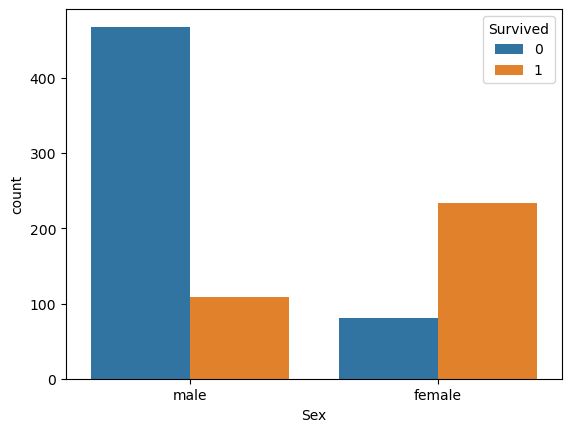

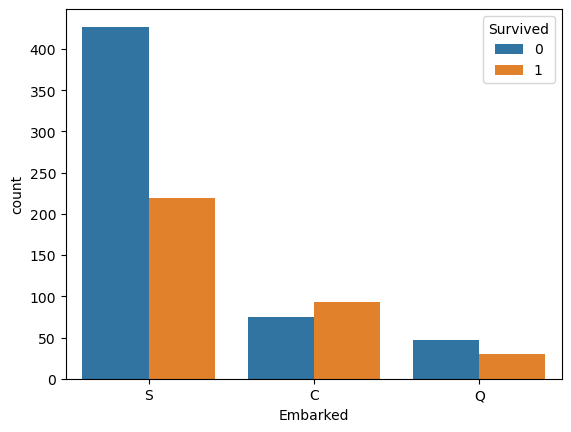

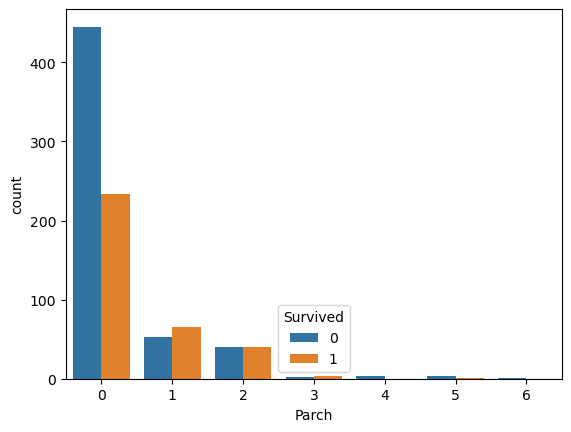

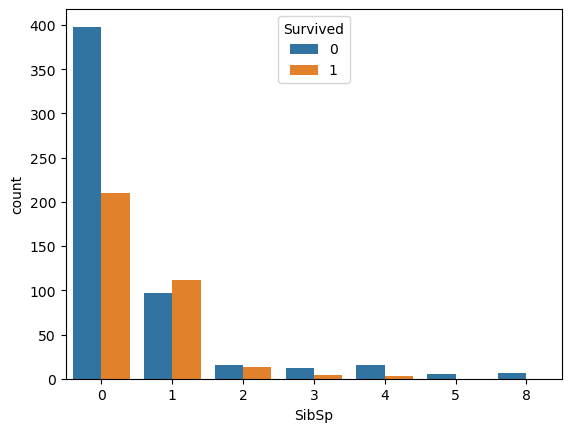

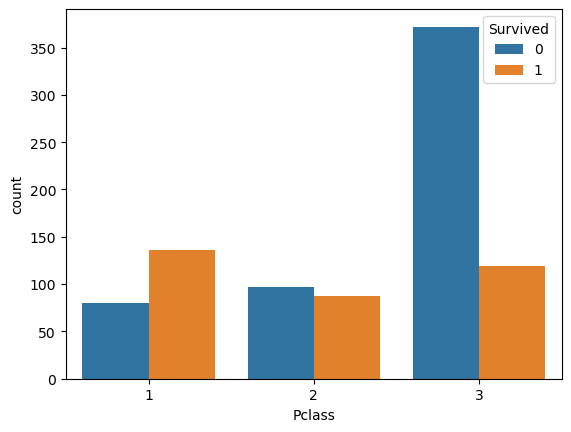

In [32]:
for i in data[["Sex","Embarked","Parch","SibSp","Pclass"]]:
    sns.countplot(data=data,x=i ,hue="Survived")
    plt.show()

##Out of the people who survived majority are females and out of the ones died majority are males

#The count plot shows that majority of people from the upper class around 370 died and majority of people from the lower class around 140 survived 

#majority of people who traveled alone died and majority of people with family have survived

##Out of  people from Southampton  and Queenstown around 475 from Southampton and 40 from Queenstown died while most people around 80 from Chersbourg survived

##out of 577  male and 314 female travellers around 470 males survived and 70 females survived

([<matplotlib.patches.Wedge at 0x1e9a8366190>,
 [Text(-0.7794180305400537, 0.9124185079606091, 'S'),
  Text(0.46400099082156876, -0.9973480237693373, 'C'),
  Text(1.059707924452334, -0.29499002500580673, 'Q')],
 [Text(-0.4546605178150313, 0.5322441296436886, '72.5%'),
  Text(0.25309144953903745, -0.544008012965093, '18.9%'),
  Text(0.5780225042467276, -0.1609036500031673, '8.6%')])

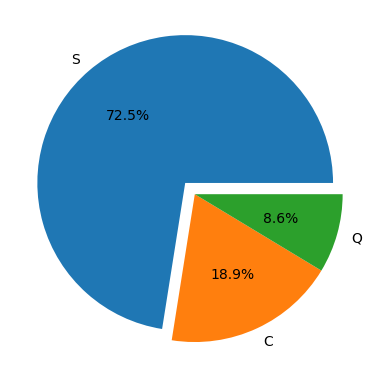

In [33]:
labels=['S', 'C', 'Q']
plt.pie(counts,labels=labels,autopct='%1.1f%%',explode=(0.1,0,0))

#The pie chart shows that around 75% of people have  mounted fromSouthampton.around 8.6% from Queenstown , and round 19%Cherbourg

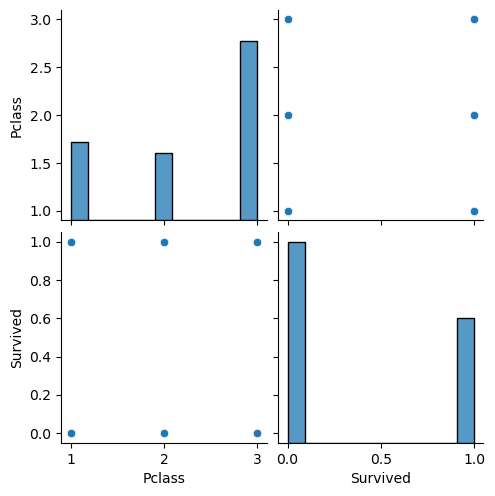

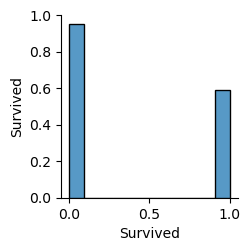

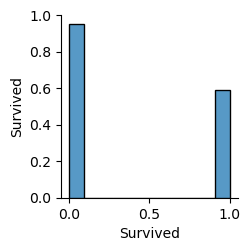

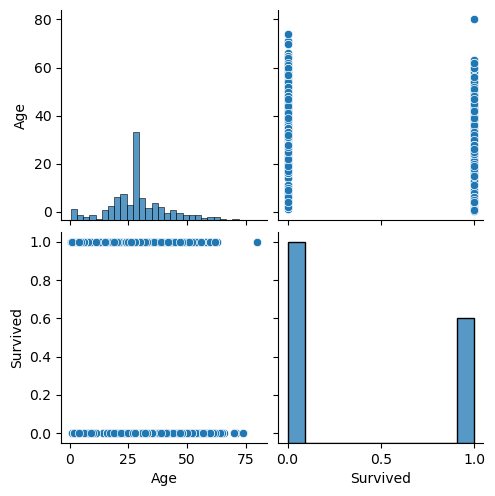

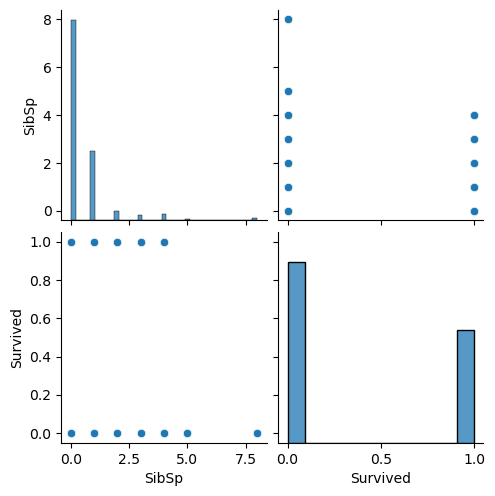

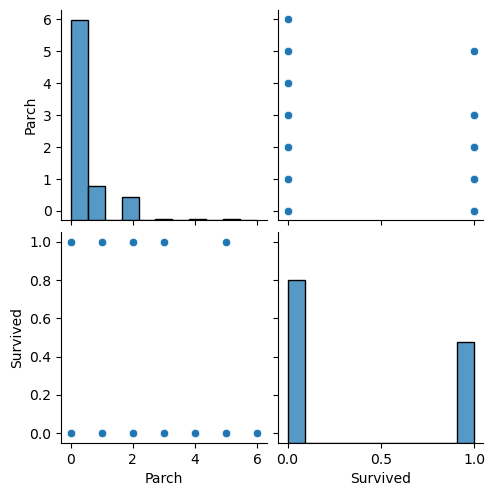

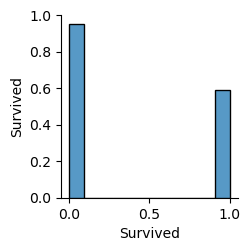

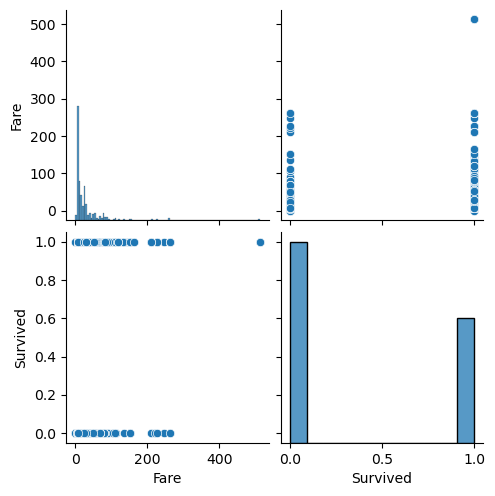

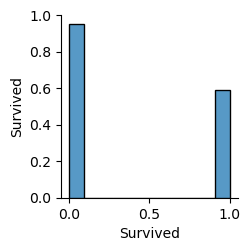

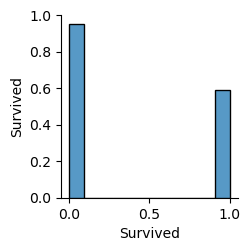

In [34]:
slice_data= data[[ 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
for i in slice_data:
    pair_data=data[[i,'Survived']]
    sns.pairplot(pair_data)
        

### Bar plot

In [35]:

Pclass_counts=data['Pclass'].value_counts()
Pclass_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

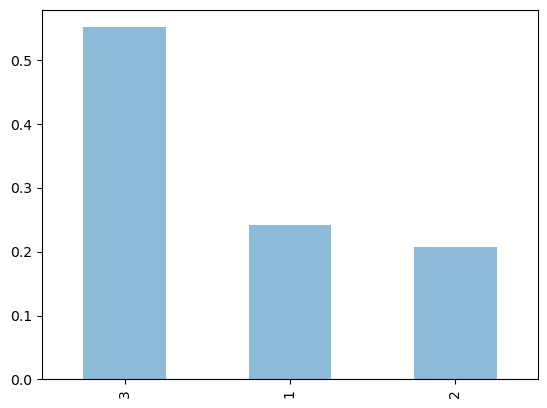

In [36]:
data.Pclass.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)

#### 55% of people are from 3rd class and 25% and 20% from second class and first class respectively

In [37]:
data.corr()['Survived']

C:\Users\munee\AppData\Local\Temp\ipykernel_12980\772106998.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Survived']


Survived    1.000000
Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

### Correlation Matrix

C:\Users\munee\AppData\Local\Temp\ipykernel_12980\3497844280.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix =data.corr()


<AxesSubplot:>

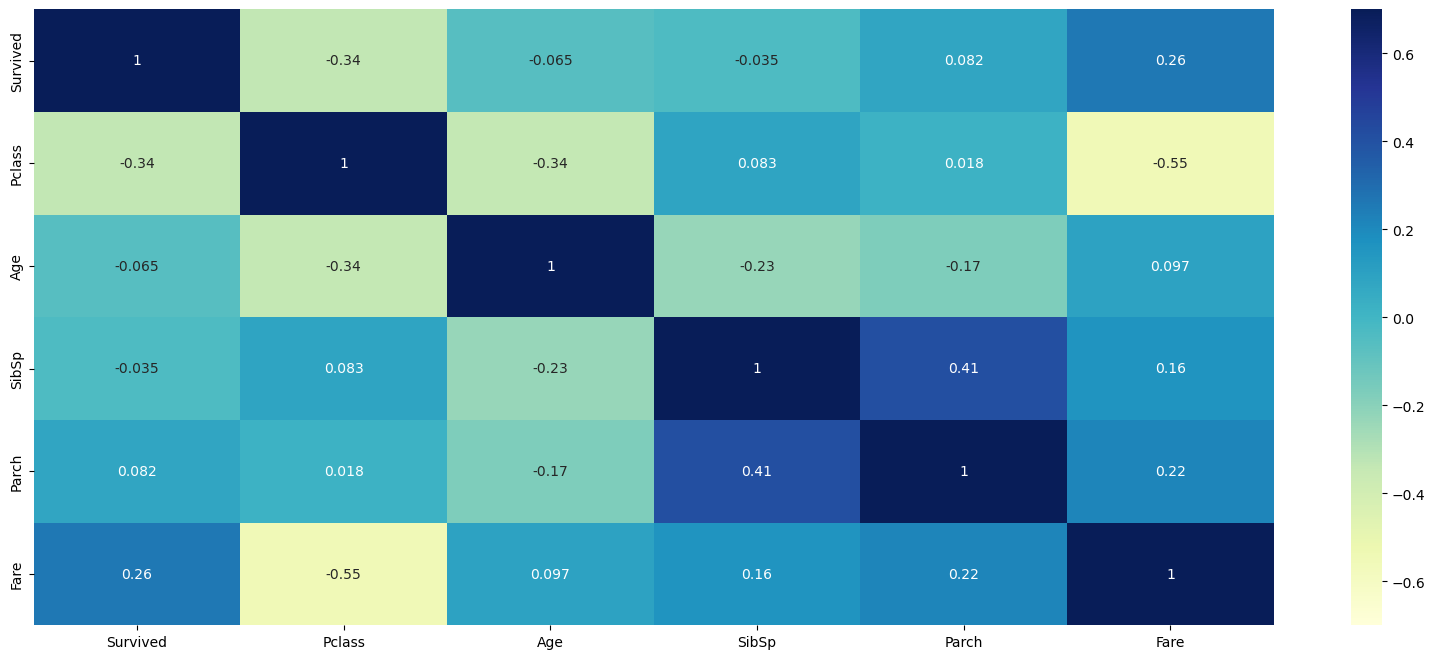

In [38]:
corrmatrix =data.corr()
plt.subplots(figsize =(20,8))
sns.heatmap(corrmatrix, annot=True,vmax=0.7,vmin=-0.7,cmap='YlGnBu')

###max correlation with target is for the Fare column 0.26
###Pclass and fare and negatively correlated  -0.55

###because no high correlation can be seen based on these no features are dropped

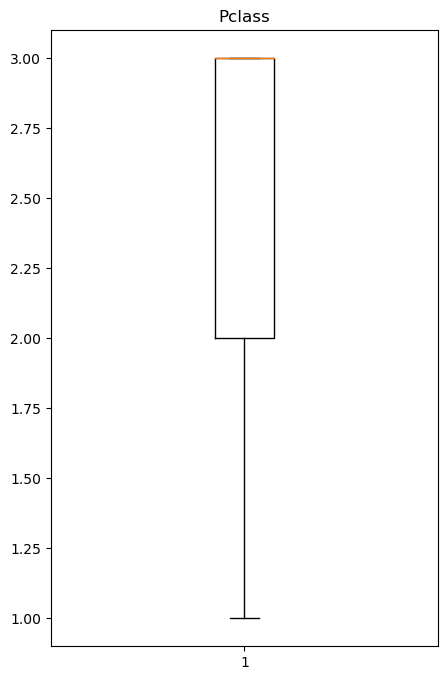

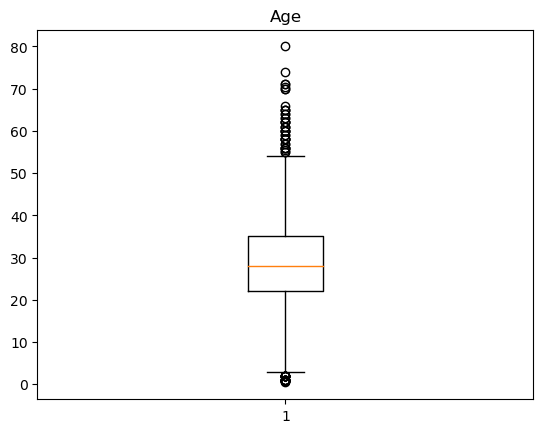

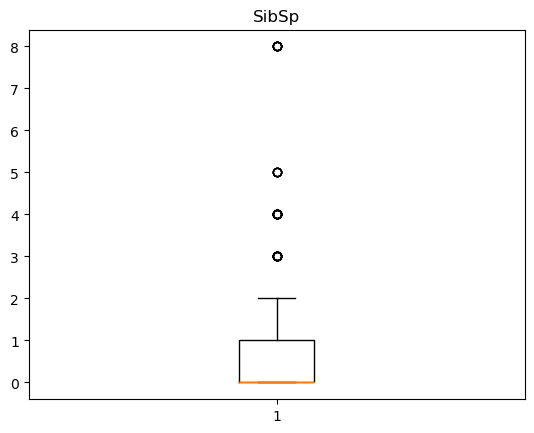

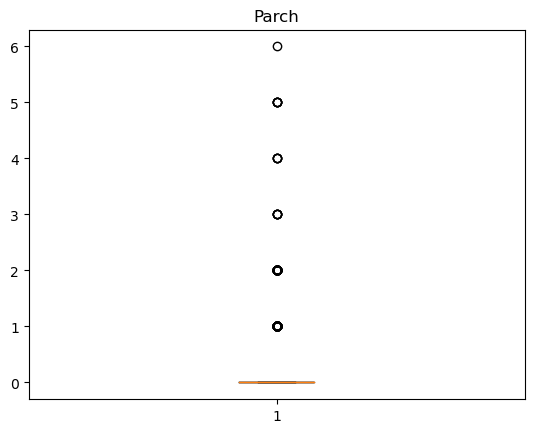

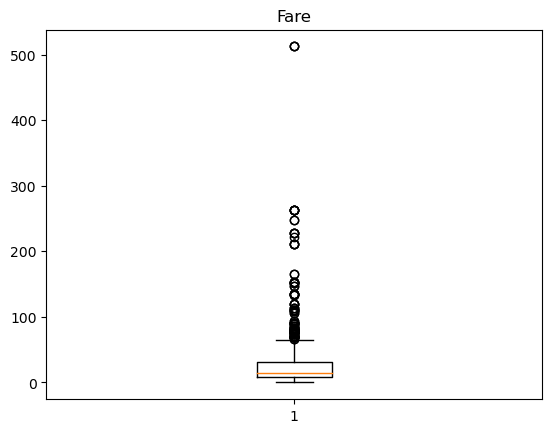

In [39]:
plt.figure(figsize = (5,8))
df=data[['Pclass','Age', 'SibSp','Parch','Fare']]
for i in df.columns:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [40]:
for i in data[['Pclass','Age', 'SibSp','Parch','Fare']]:
    
    #interquartile range
    
    Q1=np.percentile(data[i],25,interpolation='midpoint')
    Q2=np.percentile(data[i],50,interpolation='midpoint')
    Q3=np.percentile(data[i],75,interpolation='midpoint')
    
    print("InterQuartile Range is for {} :\n".format(i))

    print("Q1 :{}".format(Q1))
    print("Q2 :{}".format(Q2))
    print("Q3 :{}".format(Q3))
    
    IQR=Q3-Q1
    print("IQR :{}\n".format(IQR))
    
    #Defining upper and lower limit 
    upp_limit=Q3+1.5*IQR
    low_limit=Q1-1.5*IQR
    
    print("lower limit:{}".format(low_limit))
    print("upper limit:{}\n".format(upp_limit))
    
    
    #outlier detection
    outlier=[]
    for x in data[i]:
        if ((x > upp_limit) or (x < low_limit)):
            outlier.append(x)     
            
    print("Outlier:{}\n".format(outlier)) 
    
    
    #locating outliers 
    indupp = data[i]>upp_limit
    indlow = data[i]<low_limit
    
    
    #locating indexes of outliers 
    index_up=data.loc[indupp].index
    index_low=data.loc[indlow].index
    


    

InterQuartile Range is for Pclass :

Q1 :2.0
Q2 :3.0
Q3 :3.0
IQR :1.0

lower limit:0.5
upper limit:4.5

Outlier:[]

InterQuartile Range is for Age :

Q1 :22.0
Q2 :28.0
Q3 :35.0
IQR :13.0

lower limit:2.5
upper limit:54.5

Outlier:[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]

InterQuartile Range is for SibSp :

Q1 :0.0
Q2 :0.0
Q3 :1.0
IQR :1.0

lower limit:-1.5
upper limit:2.5

Outlier:[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]

InterQuartile Range is for Parch :

Q1 :0.0
Q2 :0.0
Q3 :0.0
IQR :0.0

lower limit:0.0
upper limit:0.0

Outlier:[1, 2, 1, 5, 1, 1, 5, 2, 2

C:\Users\munee\AppData\Local\Temp\ipykernel_12980\700363821.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data[i],25,interpolation='midpoint')
C:\Users\munee\AppData\Local\Temp\ipykernel_12980\700363821.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data[i],50,interpolation='midpoint')
C:\Users\munee\AppData\Local\Temp\ipykernel_12980\700363821.py:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint'


#### since there are too many outliers and counts mare given by the columns oit is better to cap down these

In [41]:
for i in data[numerical_features]:
    skew=data[i].skew()
    print("skewness of {} is:".format(i),skew)
    
    
#the skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value
#indicates the presence of extreme value or outlier. from the code above, the 'Fare' skewness value of 4.78 shows the 
#variable has been rightly skewed, indicating the presence of outliers
  

skewness of Survived is: 0.4785234382949897
skewness of Pclass is: -0.6305479068752845
skewness of Age is: 0.5102446555756495
skewness of SibSp is: 3.6953517271630565
skewness of Parch is: 2.7491170471010933
skewness of Fare is: 4.787316519674893



#### Sibsp and fare columns are right skewed
##### Age, Parch and Survived column is moderately skewed
##### Pclass column is moderately left skewed 


C:\Users\munee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\munee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\munee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

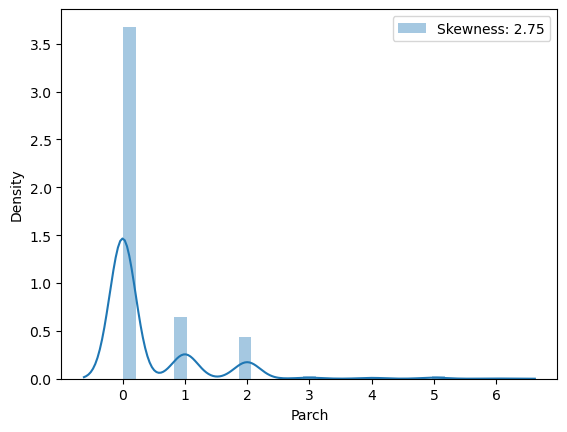

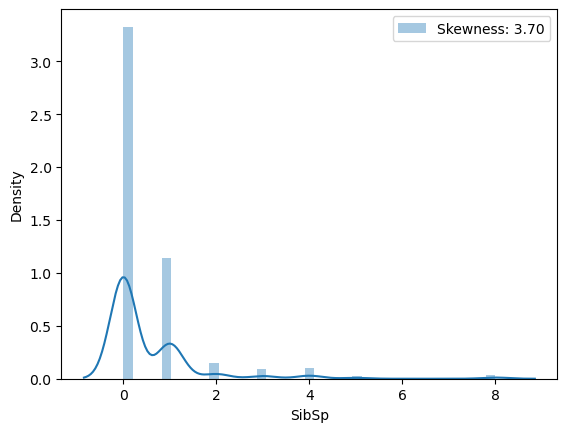

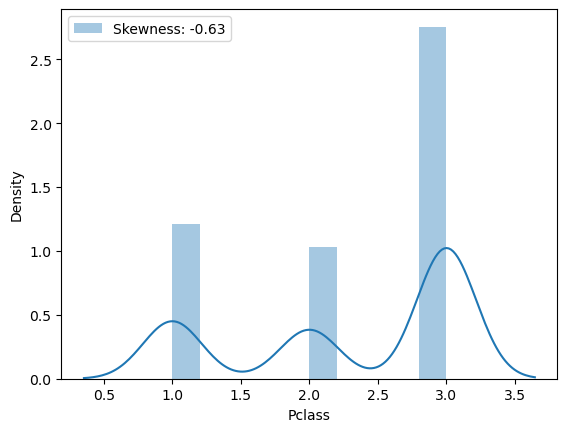

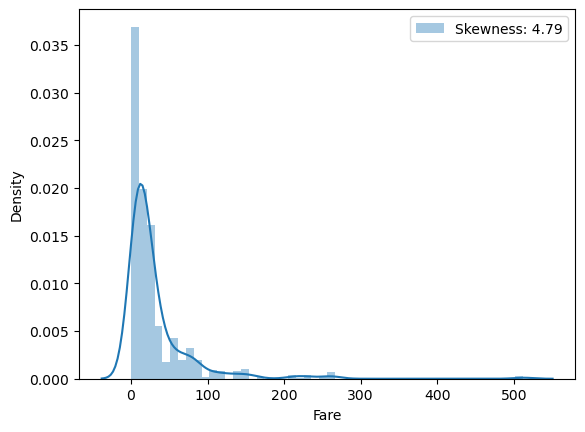

In [42]:
cols = ['Parch','SibSp', 'Pclass','Fare']
for i in data[cols]:
    plt.subplots()
    skewplot=sns.distplot(data[i],label="Skewness: %.2f"%(data[i].skew()) )
    skewplot.legend()

C:\Users\munee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


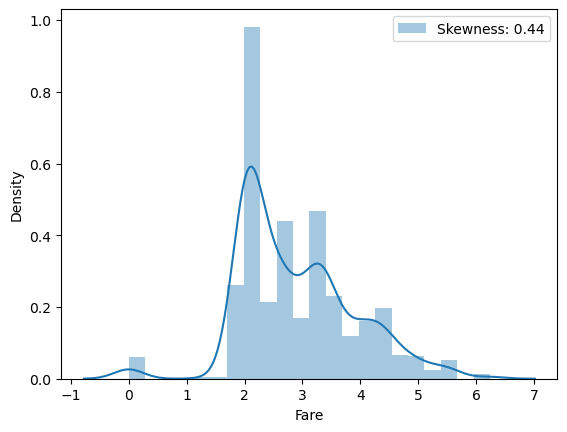

In [43]:
##log transformation
data['Fare'] = data["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(data['Fare'],label="Skewness: %.2f"%(data["Fare"].skew()) )
t.legend()

C:\Users\munee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


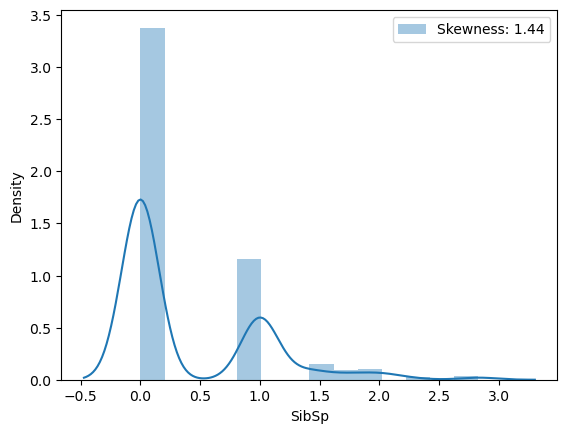

In [44]:
data["SibSp"] = data["SibSp"].map(lambda i: np.sqrt(i))
t=sns.distplot(data["SibSp"],label="Skewness: %.2f"%(data["SibSp"].skew()) )
t.legend()

C:\Users\munee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


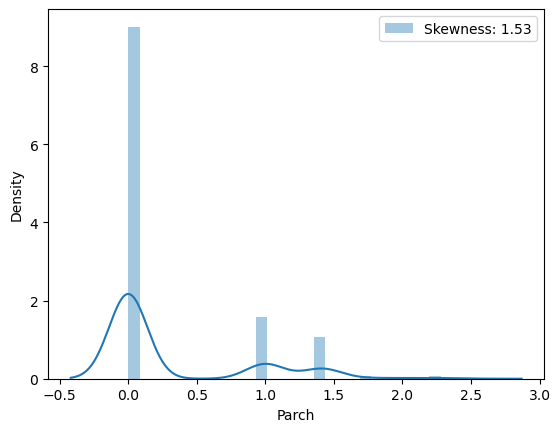

In [45]:
data["Parch"] = data["Parch"].map(lambda i: np.sqrt(i))
t=sns.distplot(data["Parch"],label="Skewness: %.2f"%(data["Parch"].skew()) )
t.legend()

data=data.drop('Ticket),axis=1

In [46]:
from sklearn.preprocessing import LabelEncoder
labelEnc=LabelEncoder()


for i in categorical_features:
    data[i]=labelEnc.fit_transform(data[i])

In [47]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,108,1,22.0,1.0,0.0,523,1.981001,47,2
2,1,1,190,0,38.0,1.0,0.0,596,4.266662,81,0
3,1,3,353,0,26.0,0.0,0.0,669,2.070022,47,2
4,1,1,272,0,35.0,1.0,0.0,49,3.972177,55,2
5,0,3,15,1,35.0,0.0,0.0,472,2.085672,47,2


In [48]:
data_prescale=data.drop(['Survived','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis =1)
data_dropped=data[['Survived','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']]
data_prescale.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

#### we can see that Age and Fare have values in very different scales. So we need to do feature scaling before predictions.

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range= (0,1))
scaled_data = minmax.fit_transform(data_prescale)

In [51]:
scaled_data=pd.DataFrame(scaled_data,columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [52]:
scaled_data=pd.concat([data_prescale,data_dropped],axis=1)


#### Splitting data into Fetures and target

In [53]:
x = scaled_data.drop('Survived',axis = 1)
y = scaled_data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

## Classification Model creation

### 1) kNN Model

In [54]:
metric_k  = []
neighbors = np.arange(3, 15)


for k in neighbors:
    knn       =  KNeighborsClassifier(n_neighbors = k)
    knn_model =  knn.fit(x_train,y_train)
    


In [55]:
    
score_knn = knn_model.score(x_test, y_test)
score_knn

C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6143497757847534

### 2)  Support Vector Machine (SVM) Model

In [56]:
# svm kernal rbf

svm1       = SVC(kernel = "rbf")
svm_model1 = svm1.fit(x_train, y_train)

In [57]:
# svm kernal poly

svm2        = SVC(kernel = "poly")
svm_model2  = svm2.fit(x_train, y_train)

In [58]:
# svm kernal linear

svm3 = SVC(kernel = "linear")
svm_model3 = svm3.fit(x_train, y_train)

## k-Fold cross validation 

In [59]:
kfold_validator = KFold(10) #number of folds is 10
for train_index, test_index in kfold_validator.split(x, y):
    print("Training index\n", train_index,"\n")

    print("Testing index\n", test_index,"\n")
 

Training index
 [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

### k-Fold Cross Validation for kNN Model

In [60]:
# Printing the validation result

cv_knn = cross_val_score(knn_model, x, y, cv = kfold_validator)
print("Validation result : ", cv_knn) 
print("\nAverage of Cross validation result ", np.mean(cv_knn))

Validation result :  [0.56666667 0.70786517 0.62921348 0.56179775 0.64044944 0.64044944
 0.65168539 0.66292135 0.69662921 0.68539326]

Average of Cross validation result  0.644307116104869


C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

### k- Fold Cross Validation for SVM Kernal = rbf 

In [61]:
# Printing the validation result

cv_svmr = cross_val_score(svm_model1, x, y, cv = kfold_validator)
print("Validation result : ", cv_svmr) 
print("\nAverage of Cross validation result ", np.mean(cv_svmr))

Validation result :  [0.57777778 0.71910112 0.62921348 0.56179775 0.66292135 0.66292135
 0.62921348 0.66292135 0.66292135 0.68539326]

Average of Cross validation result  0.64541822721598


### k- Fold Cross Validation for SVM Kernal = poly 

In [62]:
# Printing the validation result

cv_svmp = cross_val_score(svm_model2, x, y, cv = kfold_validator)
print("Validation result : ", cv_svmp) 
print("\nAverage of Cross validation result ", np.mean(cv_svmp))

Validation result :  [0.56666667 0.7752809  0.58426966 0.49438202 0.58426966 0.64044944
 0.56179775 0.62921348 0.66292135 0.62921348]

Average of Cross validation result  0.6128464419475655


### k- Fold Cross Validation for SVM Kernal = linear 

In [63]:
# Printing the validation result

cv_svml = cross_val_score(svm_model3, x, y, cv = kfold_validator)
print("Validation result : ", cv_svml) 
print("\nAverage of Cross validation result ", np.mean(cv_svml))

Validation result :  [0.8        0.82022472 0.78651685 0.84269663 0.7752809  0.78651685
 0.75280899 0.73033708 0.86516854 0.76404494]

Average of Cross validation result  0.7923595505617977


## Stratified Cross Validation 

In [64]:
skfold_validator = StratifiedKFold(n_splits = 10)
for train_index, test_index in skfold_validator.split(x, y):
    print("Training index\n", train_index)
    print("\n")
    print("Testing index\n", test_index)
    print("\n\n")

Training index
 [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

#### Stratified Cross Validation for kNN 

In [65]:
# Printing the validation result
    
skcv_knn = cross_val_score(knn_model, x, y, cv = skfold_validator)
print("Validation result : ", skcv_knn)
print("\nAverage of Cross validation result ", np.mean(skcv_knn))

Validation result :  [0.61111111 0.60674157 0.65168539 0.60674157 0.65168539 0.64044944
 0.68539326 0.6741573  0.70786517 0.68539326]

Average of Cross validation result  0.6521223470661673


C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

#### Stratified Cross Validation for SVM kernel= rbf 

In [66]:
# Printing the validation result
    
skcv_rbf = cross_val_score(svm_model1, x, y, cv = skfold_validator)
print("Validation result : ", skcv_rbf)
print("\nAverage of Cross validation result ", np.mean(skcv_rbf))

Validation result :  [0.62222222 0.66292135 0.61797753 0.61797753 0.69662921 0.64044944
 0.66292135 0.68539326 0.62921348 0.6741573 ]

Average of Cross validation result  0.6509862671660425


#### Stratified Cross Validation for SVM kernel = poly 

In [67]:
# Printing the validation result
    
skcv_poly = cross_val_score(svm_model2, x, y, cv = skfold_validator)
print("Validation result : ", skcv_poly)
print("\nAverage of Cross validation result ", np.mean(skcv_poly))

Validation result :  [0.61111111 0.61797753 0.61797753 0.61797753 0.61797753 0.61797753
 0.61797753 0.61797753 0.61797753 0.60674157]

Average of Cross validation result  0.616167290886392


#### Stratified Cross Validation for SVM kernel= linear 

In [68]:
# Printing the validation result
    
skcv_lin = cross_val_score(svm_model3, x, y, cv = skfold_validator)
print("Validation result : ", skcv_lin)
print("\nAverage of Cross validation result ", np.mean(skcv_lin))

Validation result :  [0.8        0.79775281 0.78651685 0.83146067 0.80898876 0.76404494
 0.7752809  0.74157303 0.82022472 0.78651685]

Average of Cross validation result  0.7912359550561797
